In [29]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [11]:

df_diab = pd.read_csv("/Users/tylerhaims/Documents/GitHub/Diabetes/Diabetes2021/diabetes_binary_health_indicators_BRFSS2021.csv")
print(len(df_diab['BMI']))
scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df_diab)
#scaled_data
pca = PCA(n_components=2)  # Specify the number of components you want to keep
pca.fit(df_diab)
pca_data = pca.transform(df_diab)
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])


236378


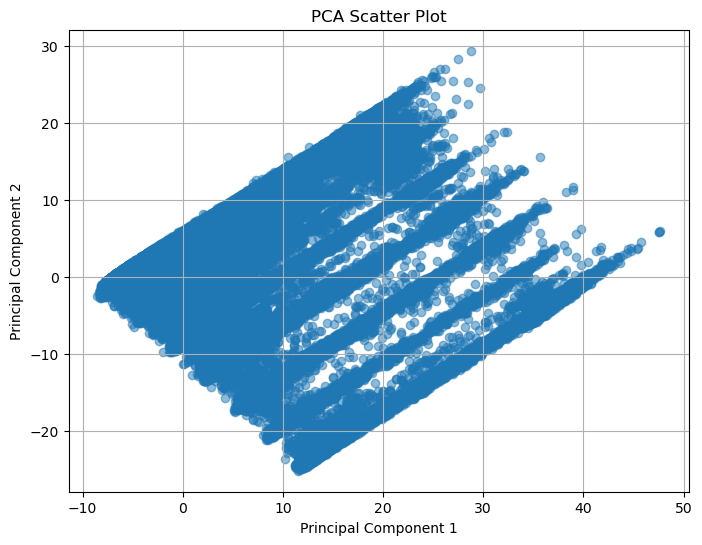

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [30]:

#labels  = np.random.randint(2,size=236378)
#labels = np.array(df_diab['Diabetes_binary'])
labels = df_diab['Diabetes_binary']
#print(labels)
# for num in labels:
#     print(num)
# print(type(labels))

X_train, X_test, y_train, y_test = train_test_split(pca_data, labels, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

#conf_matrix = confusion_matrix(X_test, y_pred)



Accuracy: 0.8386919367120738


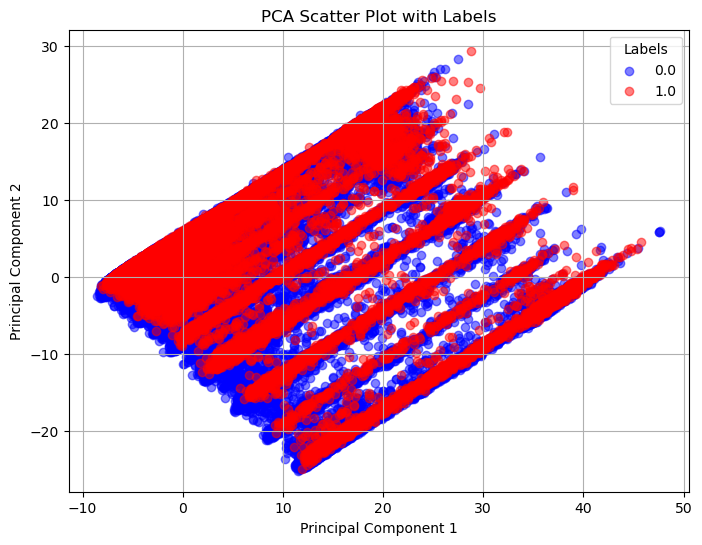

In [31]:
unique_labels = np.unique(labels)
colors = ['b', 'r']  # Define colors for each label, you can extend this for more labels

plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=color, label=label, alpha=0.5)

plt.title('PCA Scatter Plot with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.grid(True)
plt.show()

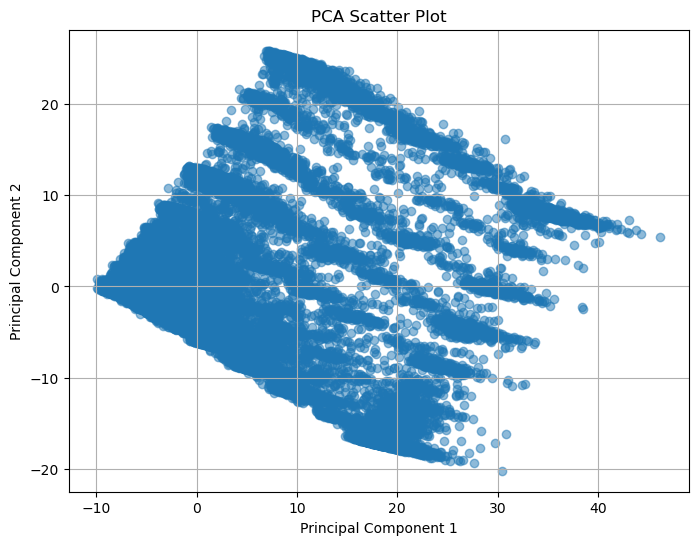

In [39]:
df_diab5050 = pd.read_csv("/Users/tylerhaims/Documents/GitHub/Diabetes/Diabetes2021/diabetes_binary_5050split_health_indicators_BRFSS2021.csv")
pca = PCA(n_components=2)  # Specify the number of components you want to keep
pca.fit(df_diab5050)
pca_data2 = pca.transform(df_diab5050)
pca_df2 = pd.DataFrame(data=pca_data2, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_data2[:, 0], pca_data2[:, 1], alpha=0.5)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [43]:
labels = df_diab5050['Diabetes_binary']
print(len(labels))

X_train, X_test, y_train, y_test = train_test_split(pca_data2, labels, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

67136
Accuracy: 0.6368781650282991


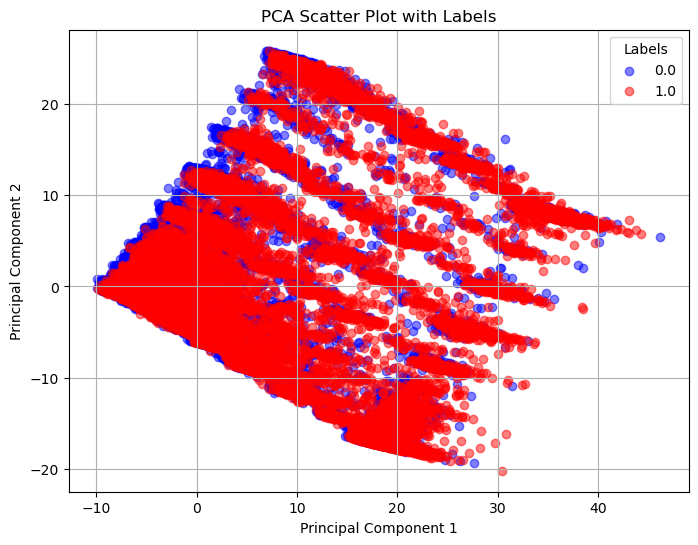

In [45]:
unique_labels = np.unique(labels)
colors = ['b', 'r']  # Define colors for each label, you can extend this for more labels

plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels, colors):
    mask = (labels == label)
    plt.scatter(pca_data2[mask, 0], pca_data2[mask, 1], c=color, label=label, alpha=0.5)

plt.title('PCA Scatter Plot with Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.grid(True)
plt.show()